**Installing required Libraries:**

In [ ]:
!pip install tensorflow
!pip install tensorflow-gpu
!pip install keras
!pip install tensorflow-base
!pip install tensorflow-estimator


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\dudeh\AppData\Local\Temp\pip-install-f1l3kyif\tensorflow-gpu_e1e4535f82d245f299c5c19f81d0f0c2\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not buil


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement tensorflow-base (from versions: none)
ERROR: No matching distribution found for tensorflow-base

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Checking whether the GPU is working properly or not ?**

In [ ]:
import tensorflow as tf
print(tf.test.is_gpu_available())
# False means not working properly

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


**ABOUT THE DATASET:**

**_Context:_**
Invasive Ductal Carcinoma (IDC) is the most common subtype of all breast cancers. To assign an aggressiveness grade to a whole mount sample, pathologists typically focus on the regions which contain the IDC. As a result, one of the common pre-processing steps for automatic aggressiveness grading is to delineate the exact regions of IDC inside of a whole mount slide.

**_Content:_**
The original dataset consisted of 162 whole mount slide images of Breast Cancer (BCa) specimens scanned at 40x. From that, 277,524 patches of size 50 x 50 were extracted (198,738 IDC negative and 78,786 IDC positive). Each patch’s file name is of the format: u_xX_yY_classC.png — > example 10253_idx5_x1351_y1101_class0.png . Where u is the patient ID (10253_idx5), X is the x-coordinate of where this patch was cropped from, Y is the y-coordinate of where this patch was cropped from, and C indicates the class where 0 is non-IDC and 1 is IDC.

**Importing the Python Libraries and Modules :**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image

_The given code block is importing various Python libraries and modules that will be used in the subsequent code._

**Loading the Dataset and Printing first 5 file paths :**

In [ ]:
# Returing a list of file paths mathing the pattern
breast_img = glob.glob('C:/OTHER DATA/STUDY MATERIAL/SEMESTER 7/IND3001 - MINOR PROJECT/Breast Cancer Classification/Dataset/**/*.png', recursive=True)
# Recursive true means, enabling function to recursive searching, meaning it searching for files in all subdirectories as well.

# Checking whether the dataset is loaded properly or not
for imgname in breast_img[:5]:
    print(imgname)

C:/OTHER DATA/STUDY MATERIAL/SEMESTER 7/IND3001 - MINOR PROJECT/Breast Cancer Classification/Dataset\10253\0\10253_idx5_x1001_y1001_class0.png
C:/OTHER DATA/STUDY MATERIAL/SEMESTER 7/IND3001 - MINOR PROJECT/Breast Cancer Classification/Dataset\10253\0\10253_idx5_x1001_y1051_class0.png
C:/OTHER DATA/STUDY MATERIAL/SEMESTER 7/IND3001 - MINOR PROJECT/Breast Cancer Classification/Dataset\10253\0\10253_idx5_x1001_y1101_class0.png
C:/OTHER DATA/STUDY MATERIAL/SEMESTER 7/IND3001 - MINOR PROJECT/Breast Cancer Classification/Dataset\10253\0\10253_idx5_x1001_y1151_class0.png
C:/OTHER DATA/STUDY MATERIAL/SEMESTER 7/IND3001 - MINOR PROJECT/Breast Cancer Classification/Dataset\10253\0\10253_idx5_x1001_y1201_class0.png


_The given code block retrieves breast image file paths using the glob module and a specific file path pattern. It then iterates over the first five image file paths and prints each path._

**Visualising the dataset:**

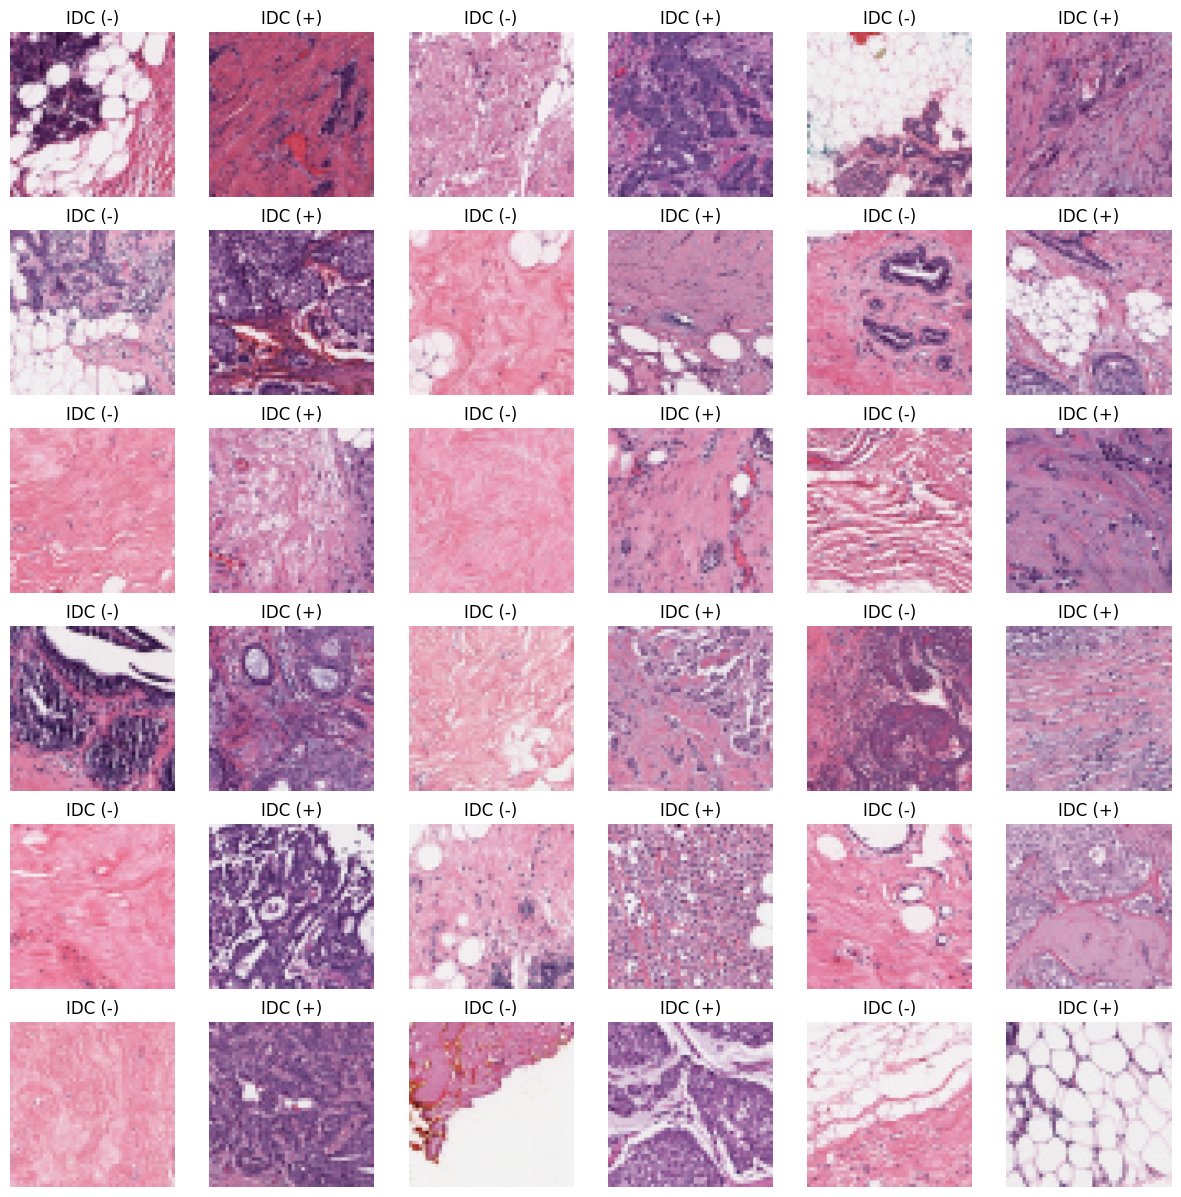

In [ ]:
# Creating two empty lists to store the file paths of images without cancer (N_IDC) and images with cancer (P_IDC).
N_IDC = []
P_IDC = []

# Iterating through each image file path in the breast_img list
for img in breast_img:
    # If last character is 0, the image is classified as having no cancer, and its file path is appended to the N_IDC list.
    if img[-5] == '0' :
        N_IDC.append(img)

    # Else if it is '1', the image is classified as having cancer, and its file path is appended to the P_IDC list.
    elif img[-5] == '1' :
        P_IDC.append(img)

# Creating a figure with a size of 15x15, this figure will contain the subplots for visualizing the images
plt.figure(figsize = (15, 15))

# Generating two sets of random indices of length 18
some_non = np.random.randint(0, len(N_IDC), 18) #non-cancerous
some_can = np.random.randint(0, len(P_IDC), 18) #cancerous

# Initialising s = 0
s = 0
# Using loop to iterate through the indices in the some-non set.
for num in some_non:

        # Using each index 'num' to access the corresponding image file path from the N_IDC list.
        img = image.load_img((N_IDC[num]), target_size=(100, 100)) #resizing the image to a target size of (100, 100) pixels
        # Converting the image to an array
        img = image.img_to_array(img)

        # Creating a subplot in the figure grid
        plt.subplot(6, 6, 2*s+1) # 6 rows, 6 columns and 2*s+1 is the position
        plt.axis('off')
        plt.title('IDC (-)') # means no cancer
        plt.imshow(img.astype('uint8'))
        # incrementing s
        s += 1

# again intitializing the value of s to 1 and repeating the same
s = 1
for num in some_can:

        img = image.load_img((P_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)

        plt.subplot(6, 6, 2*s)
        plt.axis('off')
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1

*The given code block performs the visualization of breast cancer images. It starts by categorizing the images into two lists: N_IDC (images without cancer) and P_IDC (images with cancer) based on the last character of the image file path. Then, it randomly selects 18 images from each category and displays them in a subplot grid.*

**Data Subset Analysis :**

In [ ]:
print("The total images classified for Negative-IDC are :",len(N_IDC))
print("The total images classified for Positive-IDC are :",len(P_IDC))
print("The total size of the input dataset is :", len(N_IDC)+len(P_IDC))
# Doing slicing to maintain the equality of the dataset, reduces the chances to getting the model biased
NewN_IDC=N_IDC[:78786] # Selecting the elements from index 0 to index 78785
print("The total images classified for New Negative-IDC are :",len(NewN_IDC))
print("The total size of the dataset after slicing is:", len(P_IDC)+len(NewN_IDC))

The total images classified for Negative-IDC are : 198738
The total images classified for Positive-IDC are : 78786
The total size of the input dataset is : 277524
The total images classified for New Negative-IDC are : 78786
The total size of the dataset after slicing is: 157572


*The given code block involves printing information about the total number of images classified for negative and positive IDC (Invasive Ductal Carcinoma) cases. It then performs slicing on the N_IDC list to create a new subset of the negative IDC images.*

**_Here, we can also try some other slicing options, means other options of configuring the sizes of the datasets
Basically hit & trial method_**

**Image Processing and Labeling :**

In [ ]:
# Creating two empty lists to store processes images and their labels
non_img_arr = [] #non-cancerous
can_img_arr = [] #cancerous

# For each image in NewN_IDC list
for img in NewN_IDC:
    # reading the image in colored format
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    # resizing the image to a specific size of (50, 50) pixels
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    # The other interpolation methods can indeed be used to resize the images.
    # The more details are given in the markdown section.

    #  Appending the processed image (n_img_size) and its corresponding label 0 (representing no cancer) as a list [n_img_size, 0] to the non_img_arr list.
    non_img_arr.append([n_img_size, 0])

# Doing similarly for the other list too
for img in P_IDC:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

**_By far we are using linear-interpolation method and getting the best results, but we can also try for some other methods too, of course, they have chances of yielding better results_**

Here are a few commonly used interpolation methods and their potential applications:
1. cv2.INTER_NEAREST: Uses the nearest neighbor value to interpolate pixel values. It is the fastest but may result in pixelation or loss of detail.
2. cv2.INTER_LINEAR: Uses a weighted average of the surrounding pixels to interpolate pixel values. It provides a smoother result but may introduce blurring.
3. cv2.INTER_CUBIC: Uses a bicubic interpolation algorithm to estimate pixel values. It provides a higher quality result with smoother transitions but is slower compared to linear interpolation.
4. cv2.INTER_LANCZOS4: Uses a Lanczos interpolation algorithm to estimate pixel values. It provides a high-quality result with less aliasing but is slower compared to other methods.

_The given code block involves processing and labeling the images in the NewN_IDC and P_IDC datasets. It iterates over each image in the NewN_IDC list, reads the image using OpenCV (cv2), resizes it to a specific size, and appends it along with a label of 0 to the non_img_arr list. Similarly, it performs the same operations for images in the P_IDC list, but with a label of 1, and appends them to the can_img_arr list._

**Dataset Analysis :**

In [ ]:
print("The total number of images in Non-Cancerous Dataset :",len(non_img_arr))
print("The total number of images in Cancerous Dataset :",len(can_img_arr))

# Still greater than the target of 1,00,000 images XD
print("The total number of images in the Combined Dataset :", len(non_img_arr)+len(can_img_arr))

The total number of images in Non-Cancerous Dataset : 78786
The total number of images in Cancerous Dataset : 78786
The total number of images in the Combined Dataset : 157572


_The given code block analyzes the sizes of two datasets, non_img_arr and can_img_arr, and calculates the total number of images in the combined dataset. It prints the lengths of non_img_arr and can_img_arr, representing the number of images in each dataset, and then calculates the sum of these lengths to obtain the total number of images in the combined dataset._

**Dataset Preparation and Feature Labeling :**

In [ ]:
# Creating two empty lists to store the features (images) and labels (cancer or non-cancer) respectively.
X = [] # will be used to store features
Y = [] # will be used to store labels


# Concatinating a subset of elements from the non_img_arr and can_img_arr lists
# We are reducing the size of the dataset to improve accuracy
breast_img_arr = np.concatenate((non_img_arr[:50000], can_img_arr[:50000]))
# # Yielding best results as of now
# breast_img_arr = np.concatenate((non_img_arr[:12389], can_img_arr[:12389]))

# randomly shuffling the order of the elements in the breast_img_arr array.
random.shuffle(breast_img_arr)

# Iterating over each element in the breast_img_arr array, which contains the shuffled pairs of features and labels.
for feature, label in breast_img_arr:
    X.append(feature)
    Y.append(label)

# Converting lists into numpy arrays
# This step is performed to facilitate further processing and modeling with libraries like TensorFlow and Keras.
X = np.array(X)
Y = np.array(Y)

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


_The given code block involves preparing the dataset for training or analysis. It creates two lists, X and y, to store the features and labels respectively. The breast_img_arr dataset is formed by concatenating a subset of non_img_arr and can_img_arr lists, and then it is shuffled randomly. The code then iterates over each feature and label in breast_img_arr, appending them to the X and Y lists, respectively. Finally, the X and Y lists are converted into NumPy arrays._

**_Here, we can select the size of subsets as per our requirements, changing the size of subsets can affect the accuracy of the model_**

**Dataset Description and Analysis:**

In [ ]:
# Creating a function to describe the data
def describeData(a,b):
    print('Total number of images: {}'.format(len(a))) # a will be used as to find the length of array X
    # # Can also be written in simplified manner
    # print("Total number of images :", len(a))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    #b==0 creates a boolean array where True represents IDC(-) images
    #np.sum() is used to count the number of True values IDC(-) images

    # Similarly for the other case
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))

# Using the function
describeData(X,Y)

Total number of images: 100000
Number of IDC(-) Images: 84538
Number of IDC(+) Images: 15462
Image shape (Width, Height, Channels): (50, 50, 3)


*The given code block defines a function called describeData, which takes two parameters, a and b, representing the dataset features (X) and labels (Y) respectively. Within the function, it prints various information about the dataset, including the total number of images, the number of IDC(-) images (labels equal to 0), the number of IDC(+) images (labels equal to 1), and the shape of the first image in the dataset (width, height, and channels). The function is then called with the X and Y datasets as arguments.*

**_Note: If we are not shuffling the order of elements then, Number of IDC(-) Images & Number of IDC(+) Images, both are:50000_**

**Train-Test Data Split and Categorical Encoding:**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25) #75,25 split

# # By far this is yielding the best results
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


from tensorflow.keras.utils import to_categorical
# Converting categorical labels into one-hot encoded format.
# This is necessary when working with categorical labels in neural network models.
Y_train = to_categorical(Y_train, num_classes = 2)
# num_classes: The number of classes or categories in the label data.
# In this case, since the labels represent cancer or non-cancer (a binary classification problem), num_classes is set to 2.

# Similaryly for the other
Y_test = to_categorical(Y_test, num_classes = 2)

# We have done this for Y only as it contains labels

# Printing the shape of the Training and Testing data:
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (75000, 50, 50, 3)
Testing Data Shape: (25000, 50, 50, 3)


_The given code block involves splitting the dataset into training and testing sets using the train_test_split function from the sklearn.model_selection module. It assigns the resulting splits to variables X_train, X_test, Y_train, and Y_test.
Next, it performs categorical encoding on the label arrays Y_train and Y_test using the to_categorical function from the tensorflow.keras.utils module. This encoding converts the labels into a binary matrix representation.
Finally, the code block prints the shapes of the training and testing data arrays, indicating the number of samples and their dimensions._

**_We Can Modify test-train splits for yielding different accuracies of the model_**

**Importing Model Definition and Metrics:**

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools

_The given code block involves importing necessary modules, functions, and classes related to model definition and evaluation. It includes importing the classification_report function from sklearn.metrics, as well as various components from the tensorflow.keras module such as Sequential, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Adam, SGD, binary_crossentropy, EarlyStopping, and the confusion_matrix function from sklearn.metrics._

__________________________________________________________________________________________________________________________________________________________________
**METHOD 1:-**
__________________________________________________________________________________________________________________________________________________________________

**Model Architecture Definition:**

_Defining a convolutional neural network (CNN) model using the Keras Sequential API._

In [ ]:
# Creating an earlyStopping Callback object.
early_stop=EarlyStopping(monitor='val_loss',patience=5)
# This callback monitors the validation loss during training and stops training if the loss does not improve for 5 consecutive epochs.
# It helps prevent overfitting and saves computational resources.

# Initializing a sequential model object
model = Sequential()

# Adding a 2D convolutional layer to the model, having 32 filters (also referred to as the number of output channels)
# Each filter is a small 3x3 matrix that is convolved with the input data to extract features. This means that the layer will produce 32 different feature maps.
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 3)))
# Padding="same" is used to preserve the dimensions of the input

# Adding a batch normalization layer after the convolutional layer. Batch normalization normalizes the outputs of the previous layer, improving the stability and convergence of the model during training.
model.add(BatchNormalization())

# Adding another 2D convolutional layer with similar parameters as before.
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Adding a max pooling layer with a pool size of 2x2. It performs downsampling by taking the maximum value within each 2x2 spatial neighborhood.
model.add(MaxPooling2D((2, 2)))

# Adding another batch normalization layer after the max pooling layer.
model.add(BatchNormalization())

# Adding a dropout layer that randomly sets 30% of the inputs to 0 at each training step. Dropout helps prevent overfitting by reducing interdependencies between neurons.
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Adding a flatten layer to convert the 2D feature maps from the previous layer into a 1D vector. This allows the subsequent fully connected layers to process the flattened features.
model.add(Flatten())

# Adding a fully connected dense layer with 128 units and ReLU activation.
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

_The given code block defines the architecture of a neural network model using the Sequential API from the tensorflow.keras module. The model consists of multiple layers, including Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, and Dense layers. The model is defined with a specific number of filters, kernel sizes, activation functions, and initializers for each layer._

**FAQ**

1) What is validation loss ?

_The validation loss refers to the loss value computed on a separate validation (test) dataset during the training of the neural network model.
During the training process, the model is typically trained on a training dataset, and its performance is evaluated on a separate validation dataset at the end of each training epoch. The validation loss is a metric that quantifies the discrepancy between the predicted output of the model and the true labels on the validation dataset.
The validation loss is calculated using a loss function (in this case, it is likely specified as "binary_crossentropy" in the model compilation step) that measures the dissimilarity between the predicted probabilities and the true labels. The lower the validation loss, the better the model's predictions align with the ground truth labels.
The EarlyStopping callback, which is defined as early_stop = EarlyStopping(monitor='val_loss', patience=5), monitors the validation loss during training. If the validation loss does not improve (decrease) for a certain number of consecutive epochs (defined by the patience parameter, in this case, 5), the training process is halted early to prevent overfitting.
By monitoring the validation loss and stopping the training when the loss stops improving, EarlyStopping helps prevent the model from memorizing the training data too closely and allows for early termination if the model's performance on the validation dataset does not improve significantly. This can help optimize the model's generalization ability and prevent overfitting._

2) What other activation functions and and kernel intializers can be used ?

_There are several other activation functions and kernel initializers that can be used in convolutional neural networks. Here are some commonly used options:_
Activation Functions:
- **Sigmoid**: The sigmoid function is defined as `f(x) = 1 / (1 + exp(-x))`. It squashes the input values between 0 and 1 and is often used in binary classification problems or when working with probabilities.
- **Tanh**: The hyperbolic tangent (tanh) function is defined as `f(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))`. It maps input values to the range of -1 to 1, and it is commonly used in hidden layers of neural networks.
- **LeakyReLU**: The leaky rectified linear unit (LeakyReLU) function is similar to ReLU but allows a small non-zero gradient for negative input values. It is defined as `f(x) = max(alpha * x, x)`, where alpha is a small positive constant (e.g., 0.1). It helps alleviate the "dying ReLU" problem where ReLU units can become inactive for negative inputs.
- **ELU**: The exponential linear unit (ELU) function is defined as `f(x) = x if x > 0 else alpha * (exp(x) - 1)`, where alpha is a positive constant. ELU smoothly handles negative inputs and can help improve the performance of deep neural networks.

**Other Functions:**
Linear, Binary, Gradient Descent

Kernel Initializers:
- **RandomUniform**: The RandomUniform initializer initializes the weights with random values drawn from a uniform distribution within a specified range.
- **GlorotUniform**: The GlorotUniform initializer, also known as Xavier initializer, initializes the weights using a uniform distribution scaled by the square root of the number of input and output units. It is commonly used when the network's activation functions are symmetric.
- **GlorotNormal**: The GlorotNormal initializer is similar to GlorotUniform, but it uses a normal distribution instead of a uniform distribution.
- **HeUniform**: The HeUniform initializer, also known as He initialization, initializes the weights using a uniform distribution scaled by the square root of the number of input units. It is commonly used with activation functions like ReLU.
- **HeNormal**: The HeNormal initializer is similar to HeUniform, but it uses a normal distribution instead of a uniform distribution.

_These are just a few examples, and there are other activation functions and kernel initializers available in libraries like Keras and TensorFlow. The choice of activation function and kernel initializer depends on the specific problem, network architecture, and experimentation to find the best combination for the given task._

3) Optimizing the CNN for more better accuracy:

1. Increase the number of filters in the convolutional layers: You can try increasing the number of filters in each convolutional layer to capture more complex features. For example, you can increase the filters from 32 to 64 or 128.
2. Add more convolutional layers: Consider adding more convolutional layers to capture higher-level abstractions in the data. This can help the model learn more discriminative features. Experiment with adding additional convolutional layers after the existing ones.
3. Adjust the kernel size: Try experimenting with different kernel sizes in the convolutional layers. Larger kernel sizes can capture more global patterns, while smaller kernel sizes can focus on local details. You can try using larger kernel sizes, such as (5, 5) or (7, 7), to capture more context.
4. Increase the number of units in the dense layers: Consider increasing the number of units in the dense layers, such as the 128-unit layer. This can provide the model with more capacity to learn complex relationships in the data.
5. Adjust the dropout rate: Experiment with different dropout rates to prevent overfitting. You can try reducing or increasing the dropout rate in the existing dropout layers, such as from 0.3 to 0.4 or 0.2, respectively.
6. Try different weight initializers: Explore different weight initializers, such as random normal or glorot uniform, to initialize the model's weights. This can affect the model's learning dynamics and convergence.
7. Increase the patience value for early stopping: Consider increasing the patience value for the early stopping callback. This allows the model to train for more epochs without improvement before stopping. However, be cautious not to overfit the model by training for too many epochs.
8. Experiment with different optimizers: Apart from Adam, you can try other optimization algorithms such as RMSprop or SGD with momentum. Different optimizers can have varying effects on the training process and model performance.







**_Reminder for me: Watch videos on the working of the neural network_**

**Model Compilation :**

In [ ]:
# Compiling the neural network model for training.
model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

_The given code block compiles the previously defined neural network model. It uses the compile method of the model object and specifies the optimizer, loss function, and metrics for evaluation. In this case, Adam optimizer is used with a learning rate of 0.0001, binary_crossentropy is chosen as the loss function, and accuracy is selected as the evaluation metric._

**Additional Explaination :**

_Adam(learning_rate=0.0001) specifies the optimizer for training the model. Adam is an optimization algorithm that is widely used for training neural networks. The learning_rate parameter sets the step size or the rate at which the optimizer adjusts the model's weights during training. In this case, the learning rate is set to 0.0001.
loss='binary_crossentropy' specifies the loss function to be used during training. In binary classification problems, where there are two output classes (e.g., cancer or non-cancer), binary cross-entropy is a commonly used loss function. It measures the dissimilarity between the true labels and the predicted probabilities, and it is well-suited for optimizing binary classification models.
metrics=['accuracy'] specifies the evaluation metric(s) to be used during training. In this case, 'accuracy' is chosen as the metric. Accuracy is a common evaluation metric for classification tasks, and it measures the percentage of correctly predicted samples out of the total samples.
By calling model.compile(), the model is prepared for the training process._

**Other Optimization Algorithms that can be used:**

There are several optimization algorithms that can be used instead of Adam in training a neural network. Here are a few commonly used alternatives:
1. Stochastic Gradient Descent (SGD): SGD is a classic optimization algorithm for training neural networks. It updates the model's weights based on the gradient of the loss function with respect to the weights. SGD can be used with or without momentum, which helps accelerate convergence and avoid local minima.
2. RMSprop: RMSprop is an optimization algorithm that adapts the learning rate for each weight based on the recent magnitudes of the gradients. It divides the learning rate by an exponentially decaying average of squared gradients. RMSprop is known for its ability to handle sparse gradients well.
3. Adagrad: Adagrad adapts the learning rate for each parameter based on the sum of squared gradients for that parameter. It performs larger updates for parameters associated with infrequent features and smaller updates for frequently occurring features. Adagrad can be effective when dealing with sparse data.
4. Adamax: Adamax is a variant of Adam that is based on the infinity norm. It replaces the L2 norm in Adam with the L∞ norm, which can provide better stability when dealing with very large gradients.
5. Nadam: Nadam combines the ideas of Nesterov accelerated gradient (NAG) and Adam. It incorporates the NAG update rule along with the adaptive learning rate features of Adam. Nadam has been shown to converge faster and provide better generalization performance than Adam.

**Other Loss Function that can be used:**

1. Mean Squared Error (MSE): MSE can be used if the problem can be framed as a regression task rather than binary classification. It calculates the average squared difference between the predicted and true values.
2. Hinge Loss: Hinge loss is often used in Support Vector Machines (SVMs) for binary classification. It aims to maximize the margin between the decision boundary and the training samples.
3. Focal Loss: Focal loss is designed to address class imbalance issues in binary classification problems. It assigns higher weights to difficult and misclassified examples, focusing on hard-to-classify samples.
4. Weighted Binary Cross-Entropy: Weighted binary cross-entropy is used when different classes or samples have different importance. It assigns different weights to the positive and negative class samples during the calculation of the loss.
5. Dice Loss: Dice loss is commonly used in medical image segmentation tasks. It measures the overlap between the predicted and true segmentation masks, with higher values indicating better overlap.
6. Huber Loss: Huber loss is a robust loss function that combines the advantages of MSE and MAE (Mean Absolute Error). It provides a smooth loss function that is less sensitive to outliers.
7. Binary Cross-Entropy: Binary cross-entropy is often used for binary classification problems. It measures the dissimilarity between the true binary labels and the predicted probabilities. It works well when the output classes are mutually exclusive.
8. Categorical Cross-Entropy: Categorical cross-entropy is used for multi-class classification problems. It measures the dissimilarity between the true categorical labels and the predicted probabilities. It is suitable when the output classes are mutually exclusive and there are more than two classes.
9. Sparse Categorical Cross-Entropy: Sparse categorical cross-entropy is similar to categorical cross-entropy but is used when the true labels are given as integers instead of one-hot encoded vectors. It avoids the need for explicit one-hot encoding of the true labels.
10. Binary Hinge Loss: Binary hinge loss is often used for binary classification problems in Support Vector Machines (SVMs). It aims to maximize the margin between the decision boundary and the training samples.
11. Kullback-Leibler Divergence (KL Divergence): KL divergence is a measure of dissimilarity between two probability distributions. It can be used as a loss function for tasks such as generative modeling or when training with variational autoencoders.

**Model Summary :**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 32)       128       
 hNormalization)                                                 
                                                        

_The given code block prints a summary of the neural network model, providing a concise overview of its architecture and the number of trainable parameters in each layer. The summary includes information such as layer type, output shape, number of parameters, and the total number of parameters in the model._

**Model Training :**

In [ ]:
#starting the timer so as to keep a track of how much time it took to train the model;
from timeit import default_timer as timer
start = timer()
#  Training the neural network model on the training and testing data
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 2, batch_size = 35)
# Giving best results in epochs = 40

#printing the time it took to train the model
print("The total time consumed for training the model is :", timer()-start)

Epoch 1/2
2143/2143 [==============================] - 454s 211ms/step - loss: 0.2981 - accuracy: 0.8749 - val_loss: 0.4030 - val_accuracy: 0.8094
Epoch 2/2
2143/2143 [==============================] - 454s 212ms/step - loss: 0.2531 - accuracy: 0.8908 - val_loss: 0.3349 - val_accuracy: 0.8562
The total time consumed for training the model is : 907.5612025


_X_train and Y_train are the training data, where X_train contains the input features and Y_train contains the corresponding true labels._

_validation_data=(X_test, Y_test) specifies the validation data to be used during training. X_test and Y_test contain the validation data, which are separate from the training data. The model will be evaluated on these data at the end of each epoch to monitor its performance and detect overfitting._

_epochs=2 specifies the number of training epochs. An epoch refers to one complete pass through the entire training dataset. In this case, the model will be trained for 2 epochs, meaning it will iterate over the training data 2 times._

_batch_size=35 determines the number of samples that will be propagated through the network at once. In each epoch, the training data will be divided into batches, and each batch will be used to update the model's weights. The batch size of 35 means that 35 samples will be processed at a time._

_The model.fit() function starts the training process. During training, the model's weights are adjusted based on the provided training data using backpropagation and the specified optimizer and loss function. The validation data is used to evaluate the model's performance and monitor its generalization ability. The training process continues for the specified number of epochs, and the history object is returned, which contains the training and validation metrics recorded at each epoch._

The given code block trains the compiled neural network model using the fit method. It specifies the training data (X_train and Y_train) as well as the validation data (X_test and Y_test) for evaluation during training. The code also sets the number of epochs to 40 and the batch size to 35. The training progress and metrics are stored in the history variable.

__________________________________________________________________________________________________________________________________________________________________
**METHOD 2:-**
__________________________________________________________________________________________________________________________________________________________________

**Building a CNN Model with EfficientNetV2S base model:**

In [ ]:
# Defining the desired size of the input images
img_size = (50, 50)

# Defining the image channels, since the images are in RGB format, therefore no. of channels will be 3
channels = 3

# Defining the shape of the input images. It will be used as the input shape for the model.
img_shape = (img_size[0], img_size[1], channels)

# The labels are 2 or the dataset is categorized into two categories
class_count = 2 # Indicates the number of classes or categories in the dataset.
# In this case, the model is designed for binary classification, so there are two classes.

# Creating the base (pre-trained) model using EfficientNetV2S architecture.
# (we can built on pretrained model such as :  efficientnet, VGG , Resnet )
base_model = tf.keras.applications.EfficientNetV2S(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

# Defining the complete model architecture using a sequential model from Keras.
model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(2, activation= 'softmax')
])

# Printing a summary of the model architecture, displaying the layer configurations and the number of trainable parameters.
model.summary()

_The above code snippet is building a convolutional neural network (CNN) model using the EfficientNetV2S as the base model. The base model is loaded with pre-trained weights from the ImageNet dataset. The model architecture includes a batch normalization layer, a dense layer with regularization, a dropout layer, and a final dense layer with softmax activation for binary classification. The summary function is used to print the summary of the model architecture, displaying the layer configurations and the number of trainable parameters._

**Model Compilation and Training:**

In [ ]:
model.compile(Adamax(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 2, batch_size = 35)

_In this code block, the model is compiled with the Adamax optimization algorithm, and the training process is performed for a specified number of epochs and batch size. The model is trained on the training data X_train and Y_train, while the validation data X_test and Y_test are used to evaluate the model's performance during training. The model's loss is calculated using binary cross-entropy, and the accuracy is used as the evaluation metric. The training history is stored in the history variable for further analysis or visualization._

__________________________________________________________________________________________________________________________________________________________________

**Model Training Visualization :**

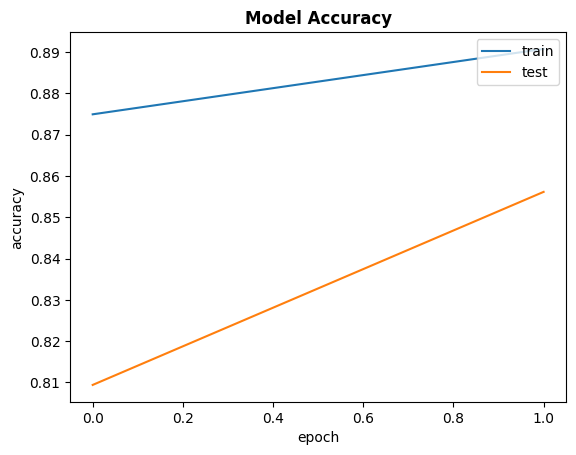

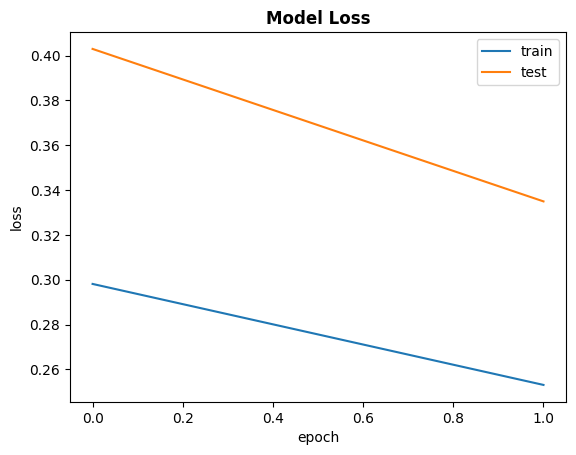

In [ ]:
# Creating a line Chart for the model's Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontweight='bold')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


# Creating a line chart for the model's loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontweight='bold')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

_The given code block plots the training and validation accuracy as well as the training and validation loss over the epochs of the model training. Two separate plots are created: one for model accuracy and another for model loss. The plots are labeled with appropriate titles, x-axis labels (epochs), and y-axis labels (accuracy and loss). Legends are added to indicate the training and testing/validation data._

**Model Evaluation and Confusion Matrix :**

782/782 [==============================] - 24s 31ms/step


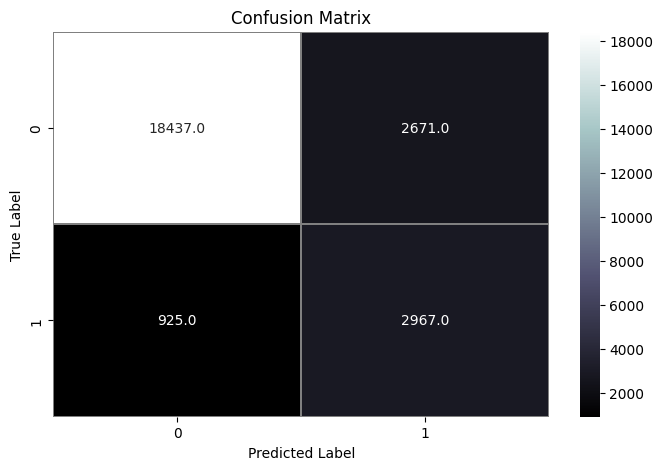

In [ ]:
from sklearn.metrics import accuracy_score

# Predicting the class probabilities for the test set
Y_pred = model.predict(X_test)

# Converting the predicted probabilities into class labels by selecting the class with the highest probability using argmax along the second axis (axis=1).
Y_pred_classes = np.argmax(Y_pred,axis = 1)

# Converting the one-hot encoded true labels into class labels
Y_true = np.argmax(Y_test,axis = 1)

# accuracy=accuracy_score(y_true=Y_true, y_pred=Y_pred)
# print(accuracy)

# Computing the confusion matrix by comparing the true labels and predicted labels
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Creating a figure and axis object to plot the confusion matrix heatmap.
f,ax = plt.subplots(figsize=(8,5))

# Creating a heatmap to visualize the confusion matrix
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="bone",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

_The given code block involves evaluating the trained model's performance on the test/validation dataset and visualizing the confusion matrix._

_First, the code block uses the trained model to predict the labels for the test dataset (Y_pred). It then extracts the predicted classes by finding the indices of the maximum values along the axis 1 (Y_pred_classes). The true labels of the test dataset are obtained by finding the indices of the maximum values along the axis 1 of Y_test (Y_true)._

_Next, the code block calculates the confusion matrix using the true labels (Y_true) and the predicted classes (Y_pred_classes). It then plots the confusion matrix using a heatmap with annotations, representing the predicted versus true labels._

**Normalized Confusion Matrix Visualization :**

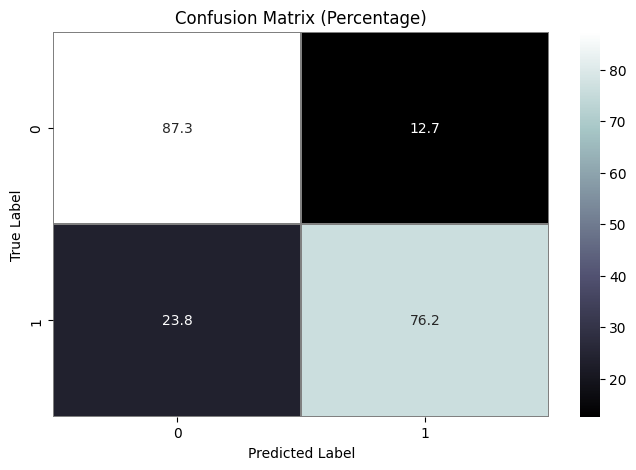

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
#Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# calculating the percentage
confusion_mtx_percent = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis] * 100

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_mtx_percent, annot=True, linewidths=0.01, cmap="bone", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Percentage)")
plt.show()

_The given code block extends the previous code by calculating the percentage-based normalized confusion matrix. The code divides each element in the confusion matrix by the sum of the corresponding row and multiplies it by 100 to obtain the percentage.
The code then visualizes the normalized confusion matrix using a heatmap with annotations. The heatmap represents the percentage of predicted versus true labels, providing a visual representation of the model's performance._

**Model Evaluation :**

In [ ]:
model.evaluate(X_test,Y_test)

782/782 [==============================] - 23s 29ms/step - loss: 0.3349 - accuracy: 0.8562


[0.3349427878856659, 0.8561599850654602]

The given code block evaluates the trained model on the test dataset using the evaluate method. It calculates the loss and accuracy of the model predictions for the test dataset.

__________________________________________________________________________________________________________________________________________________________________
**TESTING THE MODEL ON SOME IMAGE**
__________________________________________________________________________________________________________________________________________________________________


**Image Plotting Function :**

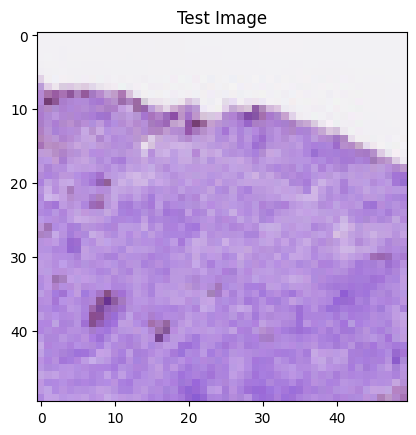

In [ ]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])

index = 1000
img_plot(X_test, index)

_The given code block defines a function called img_plot that is used for plotting images. The function takes an array of images (arr) and an index parameter (optional) that specifies the index of the image to be plotted. The function then displays the image at the specified index using the plt.imshow function and adds a title to the plot.
Additionally, the code block provides an example usage of the img_plot function by calling it with the X_test array and a specific index value. This allows the plotting of a specific test image from the X_test dataset._


**Image Prediction and True Label Comparison :**

In [ ]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
index = 4000
input = X_test[index:index+1]
pred = model.predict(input)[0].argmax()
label = Y_test[index].argmax()
print('Predicted Value using  cnn model:',pred)
print("True Value:",label)

1/1 [==============================] - 0s 17ms/step
Predicted Value using  cnn model: 1
True Value: 0


_The given code block extends the previous code by utilizing the img_plot function and providing an example usage scenario.
First, the code block defines the img_plot function, which takes an array of images (arr) and an index parameter (optional) to plot a specific image. The function displays the image at the specified index using plt.imshow and adds a title to the plot.
Next, the code block sets a specific index value to select a test image from the X_test dataset. It then creates an input array that contains only the selected image for prediction. The model.predict function is used to obtain the prediction output, and argmax is applied to retrieve the predicted class label.
The true label of the selected test image is obtained by applying argmax to the corresponding element in the Y_test array.
Finally, the code block prints the predicted value using the cnn model and the true value, providing a comparison between the predicted and true labels of the selected image._

__________________________________________________________________________________________________________________________________________________________________


**Model Saving :**

In [ ]:
model.save("C:/OTHER DATA/STUDY MATERIAL/SEMESTER 7/IND3001 - MINOR PROJECT/Breast Cancer Classification/Output/Brest_CNN_MY_Model.h5")

The given code block saves the trained model into a file using the save method. The model is saved with the specified file path "C:/OTHER DATA/STUDY MATERIAL/SEMESTER 7/IND3001 - MINOR PROJECT/Breast Cancer Classification/Output/Brest_CNN_MY_Model.h5".